# 🐶End-to-end Multiclass Dog Breed Classification

This notebook builds an end-to-end multi class image classifier using Tensorflow 2.x and Tensorflow Hub.

## 1. Problem

Identify the breed of the dog by the given image of the dog.

When I'm sitting at the cafe and I take a photo of a dog, I want to know what breed of dog it is.


## 2. Data


The data we're using is from Kaggle's dog breed identification competition.

https://www.kaggle.com/c/dog-breed-identification/data


## 3. Evaluation

The evaluation is a file with prediction probabilities for each dog breed of each test image.

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation


## 4. Features

Some features about data:
* We're are dealing with images (unstructured data) so it's probably best to use deep learning/ transfer learning.
* There are 120 different breeds of dogs (This means there are 120 different classes).
* There are 10,000+ images in the  training set (these images have labels).
* There are 10,000+ images in the test set (these images have no labels since we'll be predicting  




In [24]:
# Unzip the data
# !unzip "/content/drive/MyDrive/Colab Notebooks/Dog Vision /dog-breed-identification.zip" -d "/content/drive/MyDrive/Colab Notebooks/Dog Vision "

## Get our workspace ready

- Import Tensorflow 2.x ✅
- Import Tensorflow Hub ✅
- Make sure we're using a GPU ✅

In [25]:
# Import Tensorflow
import tensorflow as tf
import tensorflow_hub as hub
print("Tensorflow version:", tf.__version__)
print("Tensorflow_hub version:", hub.__version__)

# Check for GPU availability
print("GPU", "available (YES!)" if tf.config.list_physical_devices("GPU") else
      "not available :(")

Tensorflow version: 2.15.0
Tensorflow_hub version: 0.16.1
GPU available (YES!)


## Getting our data ready (turning into tensors)

With all machine learning models, our data  has to be in numerical format.So that's what we will be doing first.Turning our images into Tensors(numerical representation).

Let's start by accessing our data and checking out the labels.

In [26]:
# check out the label of the data

import pandas as pd
labels_csv = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dog Vision/labels.csv")
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [27]:
labels_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


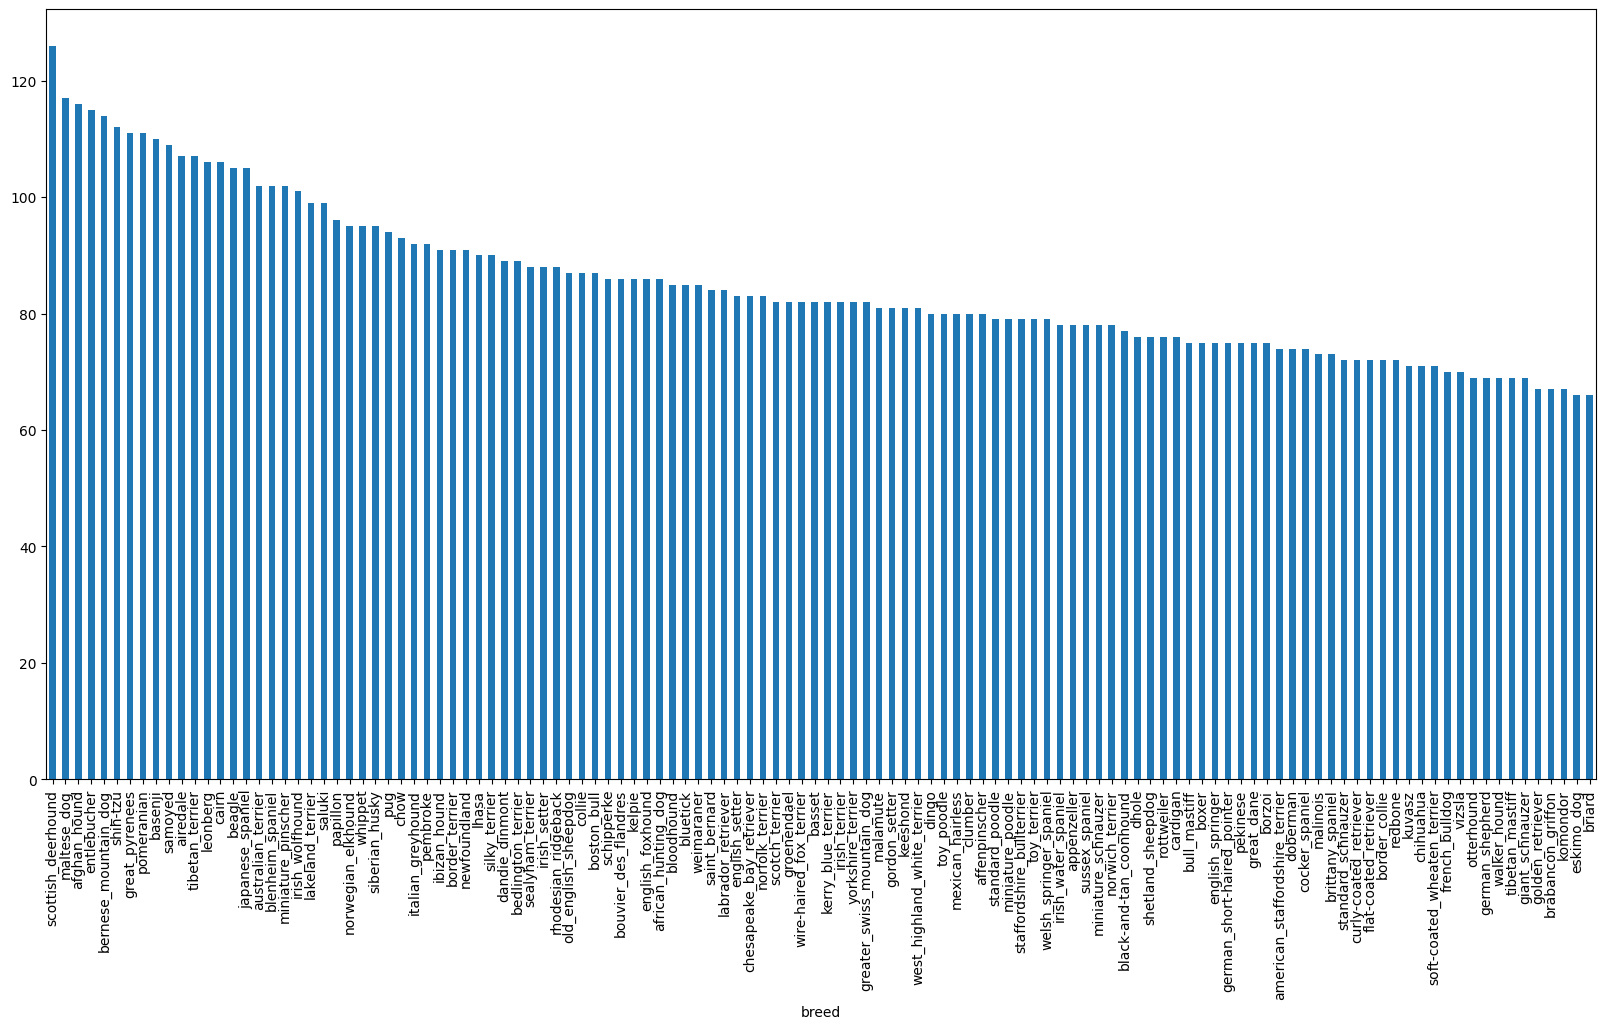

In [28]:
# how many images are there in each breed?
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10));

In [29]:
# What's the median number of images per class?
labels_csv["breed"].value_counts().median()

82.0

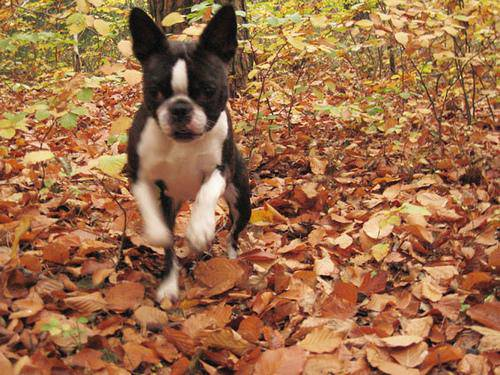

In [34]:
# lets view an image
from IPython.display import Image
Image("/content/drive/MyDrive/Colab Notebooks/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

### Getting Images and their labels

Let's get a list of all our images file pathnames.

In [31]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [32]:
# Creat a path name for image Id's

filenames = ["drive/MyDrive/Colab Notebooks/Dog Vision/train/" + fname + ".jpg" for fname in labels_csv[ "id"]]

# Check for forst 10 rows
filenames[:10]

['drive/MyDrive/Colab Notebooks/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Colab Notebooks/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Colab Notebooks/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Colab Notebooks/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Colab Notebooks/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Colab Notebooks/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Colab Notebooks/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Colab Notebooks/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Colab Notebooks/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Colab Notebooks/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [36]:
# Check whether number of filenames matches number of actual image files

import os
if len(os.listdir("/content/drive/MyDrive/Colab Notebooks/Dog Vision/train")) == len(filenames):
  print("Filename matches actual number of files ! Proceed.")
else:
  print("File name not matched check target directory")


Filename matches actual number of files ! Proceed.


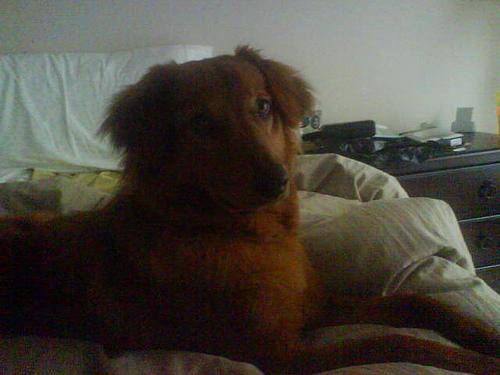

In [39]:
# one miore check
Image(filenames[1000])

In [40]:
labels_csv["breed"][1000]

'irish_setter'